http://pandas.pydata.org/pandas-docs/stable/10min.html

https://hackmd.io/@wiimax/10-minutes-to-pandas

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

導入需要使用的模組

In [86]:
import pandas as pd
import numpy as np


In [87]:
import matplotlib.pyplot as plt

In [88]:
%matplotlib inline

Ｑ請嘗試引入模組 seaborn as sns

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

。通過傳入一個list創建Series，pandas預設會產生整數的index

In [89]:
s = pd.Series([1,3,5,np.nan,6,8])

In [90]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [102]:
s.max()

8.0

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

。以帶有日期的datatime index及標籤欄位創建DataFrame

In [91]:
dates = pd.date_range('20130101', periods=6)

In [92]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [93]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [94]:
df

,A,B,C,D
2013-01-01,0.625860,-0.098910,-1.485298,-1.236345
2013-01-02,-0.108893,0.420404,1.159017,1.504429
2013-01-03,-0.335711,-2.005796,-0.549074,-2.158724
2013-01-04,1.491892,-1.464178,-0.345075,0.945367
2013-01-05,1.363785,1.074668,-0.890602,-0.426670
2013-01-06,-0.913508,0.613940,-0.413968,-0.221159


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

。以字典dict創建DataFrame

In [95]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [96]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [97]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Ｑ：請嘗試用pd.DataFrame()創一個df5,包含三個課程的名稱，老師，上課時間

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

如果用IPython、Jupyter notebook等筆記本形式使用Tab可自動展示補全所有的屬性、自定義欄位。

In [98]:
# df2.<TAB>

![alt text](100.png)

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

。以.head(n)查前n筆資料、以tail(n)查看末n筆資料。

In [99]:
df.head()

,A,B,C,D
2013-01-01,0.625860,-0.098910,-1.485298,-1.236345
2013-01-02,-0.108893,0.420404,1.159017,1.504429
2013-01-03,-0.335711,-2.005796,-0.549074,-2.158724
2013-01-04,1.491892,-1.464178,-0.345075,0.945367
2013-01-05,1.363785,1.074668,-0.890602,-0.426670


In [100]:
df.tail(3)

,A,B,C,D
2013-01-04,1.491892,-1.464178,-0.345075,0.945367
2013-01-05,1.363785,1.074668,-0.890602,-0.426670
2013-01-06,-0.913508,0.613940,-0.413968,-0.221159


Display the index, columns, and the underlying numpy data

。以.index, .columns顯示索引及欄位名稱。

In [101]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[-2.36639209e-01, -3.04440359e-01, -4.21614938e-01,
        -1.41928698e+00],
       [-1.00974853e-03,  3.30530595e-01,  4.58006316e-01,
        -1.49931063e-01],
       [ 3.35898424e-01, -1.09346468e+00,  1.97164443e-01,
         2.37169771e+00],
       [-4.19676247e-01,  5.36754404e-02, -6.25958412e-01,
         4.65237130e-01],
       [-1.06799638e+00,  1.82923646e-01, -4.34456958e-01,
        -3.99951885e-02],
       [ 2.09327929e-01, -1.22069624e+00,  4.89468608e-01,
        -1.45203303e+00]])

。以describe()快速檢視數據統計摘要

Describe shows a quick statistic summary of your data

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.196683,-0.341912,-0.056232,-0.037385
std,0.509369,0.666726,0.495497,1.412789
min,-1.067996,-1.220696,-0.625958,-1.452033
25%,-0.373917,-0.896209,-0.431246,-1.101948
50%,-0.118824,-0.125382,-0.112225,-0.094963
75%,0.156744,0.150612,0.392796,0.338929
max,0.335898,0.330531,0.489469,2.371698


。以T轉置資料矩陣(列、欄互換)

Transposing your data

In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.236639,-0.001010,0.335898,-0.419676,-1.067996,0.209328
B,-0.304440,0.330531,-1.093465,0.053675,0.182924,-1.220696
C,-0.421615,0.458006,0.197164,-0.625958,-0.434457,0.489469
D,-1.419287,-0.149931,2.371698,0.465237,-0.039995,-1.452033


。依軸排序sort_index(axis=1, ascending=False)，結果為以ROW、遞增排序。

Sorting by an axis

In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.419287,-0.421615,-0.304440,-0.236639
2013-01-02,-0.149931,0.458006,0.330531,-0.001010
2013-01-03,2.371698,0.197164,-1.093465,0.335898
2013-01-04,0.465237,-0.625958,0.053675,-0.419676
2013-01-05,-0.039995,-0.434457,0.182924,-1.067996
2013-01-06,-1.452033,0.489469,-1.220696,0.209328


Sorting by value

In [22]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.209328,-1.220696,0.489469,-1.452033
2013-01-03,0.335898,-1.093465,0.197164,2.371698
2013-01-01,-0.236639,-0.304440,-0.421615,-1.419287
2013-01-04,-0.419676,0.053675,-0.625958,0.465237
2013-01-05,-1.067996,0.182924,-0.434457,-0.039995
2013-01-02,-0.001010,0.330531,0.458006,-0.149931


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

注意：雖然在互動式工作中，使用標準的Python / Numpy表達式進行選擇和設置非常直觀，並且非常方便，但對於生產代碼，我們建議使用優化過的pandas數據訪問方法，即 .at，.iat，.loc，.iloc和.ix。

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

。選擇單個列，將生成一個Series，相當於 df.A

In [23]:
df['A']

2013-01-01   -0.236639
2013-01-02   -0.001010
2013-01-03    0.335898
2013-01-04   -0.419676
2013-01-05   -1.067996
2013-01-06    0.209328
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

。以中括號[]選擇想要的rows進行切片

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-0.236639,-0.304440,-0.421615,-1.419287
2013-01-02,-0.001010,0.330531,0.458006,-0.149931
2013-01-03,0.335898,-1.093465,0.197164,2.371698


In [25]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.001010,0.330531,0.458006,-0.149931
2013-01-03,0.335898,-1.093465,0.197164,2.371698
2013-01-04,-0.419676,0.053675,-0.625958,0.465237


### Selection by Label

See more in [Selection by Label](Selection by Label)

。使用標籤取得交叉區域:

For getting a cross section using a label

In [26]:
df.loc[dates[0]]

A   -0.236639
B   -0.304440
C   -0.421615
D   -1.419287
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [27]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.236639,-0.304440
2013-01-02,-0.001010,0.330531
2013-01-03,0.335898,-1.093465
2013-01-04,-0.419676,0.053675
2013-01-05,-1.067996,0.182924
2013-01-06,0.209328,-1.220696


Showing label slicing, both endpoints are included

In [28]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.001010,0.330531
2013-01-03,0.335898,-1.093465
2013-01-04,-0.419676,0.053675


Reduction in the dimensions of the returned object

In [29]:
df.loc['20130102',['A','B']]

A   -0.001010
B    0.330531
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [30]:
df.loc[dates[0],'A']

-0.23663920857030618

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [31]:
df.iloc[3]

A   -0.419676
B    0.053675
C   -0.625958
D    0.465237
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [32]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.419676,0.053675
2013-01-05,-1.067996,0.182924


By lists of integer position locations, similar to the numpy/python style

In [33]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.001010,0.458006
2013-01-03,0.335898,0.197164
2013-01-05,-1.067996,-0.434457


For slicing rows explicitly

In [34]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.001010,0.330531,0.458006,-0.149931
2013-01-03,0.335898,-1.093465,0.197164,2.371698


For slicing columns explicitly

In [35]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.304440,-0.421615
2013-01-02,0.330531,0.458006
2013-01-03,-1.093465,0.197164
2013-01-04,0.053675,-0.625958
2013-01-05,0.182924,-0.434457
2013-01-06,-1.220696,0.489469


For getting a value explicitly

In [36]:
df.iloc[1,1]

0.3305305949041256

For getting fast access to a scalar (equiv to the prior method)

In [37]:
df.iat[1,1]

0.3305305949041256

## Boolean Indexing

Using a single column’s values to select data.

。以單欄的值選取數據

In [38]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.335898,-1.093465,0.197164,2.371698
2013-01-06,0.209328,-1.220696,0.489469,-1.452033


A where operation for getting.

。以where條件判斷選擇數據

In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,0.330531,0.458006,NaN
2013-01-03,0.335898,NaN,0.197164,2.371698
2013-01-04,NaN,0.053675,NaN,0.465237
2013-01-05,NaN,0.182924,NaN,NaN
2013-01-06,0.209328,NaN,0.489469,NaN


Using the isin() method for filtering:

。以isin()方法篩選數據

In [40]:
df2 = df.copy()

In [41]:
df2['E'] = ['one','one', 'two','three','four','three']

In [42]:
df2

,A,B,C,D,E
2013-01-01,-0.236639,-0.304440,-0.421615,-1.419287,one
2013-01-02,-0.001010,0.330531,0.458006,-0.149931,one
2013-01-03,0.335898,-1.093465,0.197164,2.371698,two
2013-01-04,-0.419676,0.053675,-0.625958,0.465237,three
2013-01-05,-1.067996,0.182924,-0.434457,-0.039995,four
2013-01-06,0.209328,-1.220696,0.489469,-1.452033,three


In [43]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.335898,-1.093465,0.197164,2.371698,two
2013-01-05,-1.067996,0.182924,-0.434457,-0.039995,four


## Setting

Setting a new column automatically aligns the data by the indexes

。設置新欄位column將自動以index對齊資料

In [44]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1

Setting values by label

In [47]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [48]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [49]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.421615,5,NaN
2013-01-02,-0.001010,0.330531,0.458006,5,1.0
2013-01-03,0.335898,-1.093465,0.197164,5,2.0
2013-01-04,-0.419676,0.053675,-0.625958,5,3.0
2013-01-05,-1.067996,0.182924,-0.434457,5,4.0
2013-01-06,0.209328,-1.220696,0.489469,5,5.0


A where operation with setting.

。以where條件判斷運算子更新值

In [51]:
df2 = df.copy()

In [52]:
df2[df2 > 0] = -df2

In [53]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.421615,-5,NaN
2013-01-02,-0.001010,-0.330531,-0.458006,-5,-1.0
2013-01-03,-0.335898,-1.093465,-0.197164,-5,-2.0
2013-01-04,-0.419676,-0.053675,-0.625958,-5,-3.0
2013-01-05,-1.067996,-0.182924,-0.434457,-5,-4.0
2013-01-06,-0.209328,-1.220696,-0.489469,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

。pandas以np.nan表示缺失值，預設情況不進行運算，參閱 Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

。.reindex()可以修改/增加/刪除索引，將回傳一個數據的副本

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [55]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [56]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.421615,5,NaN,1.0
2013-01-02,-0.001010,0.330531,0.458006,5,1.0,1.0
2013-01-03,0.335898,-1.093465,0.197164,5,2.0,NaN
2013-01-04,-0.419676,0.053675,-0.625958,5,3.0,NaN


To drop any rows that have missing data.

。丟掉有區失值的行

In [57]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.00101,0.330531,0.458006,5,1.0,1.0


Filling missing data

。對缺失值賦值

In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.421615,5,5.0,1.0
2013-01-02,-0.001010,0.330531,0.458006,5,1.0,1.0
2013-01-03,0.335898,-1.093465,0.197164,5,2.0,5.0
2013-01-04,-0.419676,0.053675,-0.625958,5,3.0,5.0


To get the boolean mask where values are nan

。以.isna()使用布林遮罩

In [59]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

。操作通常不包含缺失項

。缺失要先預處理

Performing a descriptive statistic

。執行敘述統計

In [60]:
df.mean()

A   -0.157243
B   -0.291172
C   -0.056232
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

。執行敘述統計-按欄

In [61]:
df.mean(1)

2013-01-01    1.144596
2013-01-02    1.357505
2013-01-03    1.287920
2013-01-04    1.401608
2013-01-05    1.536094
2013-01-06    1.895620
Freq: D, dtype: float64

### Apply

Applying functions to the data

。以Applying functions進行資料處理

In [62]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.421615,5,NaN
2013-01-02,-0.001010,0.330531,0.036391,10,1.0
2013-01-03,0.334889,-0.762934,0.233556,15,3.0
2013-01-04,-0.084788,-0.709259,-0.392403,20,6.0
2013-01-05,-1.152784,-0.526335,-0.826860,25,10.0
2013-01-06,-0.943456,-1.747031,-0.337391,30,15.0


In [63]:
df.apply(lambda x: x.max() - x.min())

A    1.403895
B    1.551227
C    1.115427
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [64]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [65]:
s

0    1
1    3
2    1
3    6
4    1
5    1
6    2
7    1
8    6
9    4
dtype: int64

In [66]:
s.value_counts()

1    5
6    2
4    1
3    1
2    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

字符串方法


。Series 配備了一組字串處理方法，在 str 屬性中使用這些方法可以方便地對數組的每個元素進行操作，例如下面的代碼片段。

請注意，str 中的模式匹配通常默認使用正則表達式（有些情況下總是使用它們）。在矢量化字串方法中了解更多信息。

In [67]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [68]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

。pandas 提供各種功能，方便地將 Series、DataFrame 和 Panel 物件進行組合，使用各種索引集邏輯以及關係代數功能進行 join / merge 類型操作

Concatenating pandas objects together with concat():

。pandas提供各種簡易的合併Series及Dataframe物件操作方式

In [69]:
df = pd.DataFrame(np.random.randn(10, 4))

In [70]:
df

,0,1,2,3
0,-1.453782,1.204244,0.655425,0.480950
1,0.619120,0.215434,-1.345612,-0.754036
2,-0.296504,-1.099120,0.408657,0.298342
3,1.360674,-0.180256,-0.767671,0.437318
4,0.616850,0.356710,0.845819,1.830318
5,-0.597403,0.500322,0.171754,-0.226674
6,0.895829,-1.196786,-0.106570,1.071090
7,-0.080421,-0.063954,-0.544806,1.055742
8,-1.171409,0.118064,-1.654786,0.229060
9,0.104208,0.830431,-0.234250,1.408399


In [71]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [72]:
pd.concat(pieces)

,0,1,2,3
0,-1.453782,1.204244,0.655425,0.480950
1,0.619120,0.215434,-1.345612,-0.754036
2,-0.296504,-1.099120,0.408657,0.298342
3,1.360674,-0.180256,-0.767671,0.437318
4,0.616850,0.356710,0.845819,1.830318
5,-0.597403,0.500322,0.171754,-0.226674
6,0.895829,-1.196786,-0.106570,1.071090
7,-0.080421,-0.063954,-0.544806,1.055742
8,-1.171409,0.118064,-1.654786,0.229060
9,0.104208,0.830431,-0.234250,1.408399


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [73]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [74]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [75]:
left

,key,lval
0,foo,1
1,foo,2


In [76]:
right

,key,rval
0,foo,4
1,foo,5


In [77]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [78]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [79]:
df

,A,B,C,D
0,0.317333,-1.262714,-0.308632,2.019217
1,0.372528,0.690726,-0.033308,0.138962
2,-1.437959,-0.943952,-1.583308,-2.721795
3,-1.248480,-0.339849,0.206277,-0.812959
4,0.002506,-0.955707,-1.289460,-0.494837
5,-0.179337,1.986354,-0.298830,-1.033477
6,-0.278389,0.172004,-1.013093,1.550402
7,-0.521900,1.226730,0.304245,1.791005


In [80]:
s = df.iloc[3]

In [81]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.317333,-1.262714,-0.308632,2.019217
1,0.372528,0.690726,-0.033308,0.138962
2,-1.437959,-0.943952,-1.583308,-2.721795
3,-1.248480,-0.339849,0.206277,-0.812959
4,0.002506,-0.955707,-1.289460,-0.494837
5,-0.179337,1.986354,-0.298830,-1.033477
6,-0.278389,0.172004,-1.013093,1.550402
7,-0.521900,1.226730,0.304245,1.791005
8,-1.248480,-0.339849,0.206277,-0.812959


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

透過“group by”將數據對每個分組應用不同的function並結合展示成果，過程為:
    
1. 依據某種標準將數據拆分(Splitting)為組
2. 將設計好的功能(applying)對每個組獨立處理。
3. 結合(Combining)成果至資料結構

In [82]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [83]:
df

,A,B,C,D
0,foo,one,-0.526264,0.965709
1,bar,one,0.257500,1.648083
2,foo,two,0.797139,-1.118119
3,bar,three,-0.341664,0.878578
4,foo,two,1.277458,-0.534953
5,bar,two,2.000695,0.098471
6,foo,one,-0.084159,-1.455240
7,foo,three,-1.285764,0.612350


Grouping and then applying a function sum to the resulting groups.

In [84]:
df.groupby('A').sum()

,C,D
A,,
bar,1.916531,2.625132
foo,0.178411,-1.530253


In [85]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.257500  1.648083
    three -0.341664  0.878578
    two    2.000695  0.098471
foo one   -0.610423 -0.489531
    three -1.285764  0.612350
    two    2.074598 -1.653072

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [89]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [90]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [91]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [92]:
df2 = df[:4]

In [93]:
df2

A         B
first second                    
bar   one     0.572910  1.434874
      two     0.132343  0.352406
baz   one     0.410175  0.184007
      two     0.573647 -1.462030

The stack() method “compresses” a level in the DataFrame’s columns.

使用stack()方法將DataFrame壓縮(compresses) 為階層形式的欄位

In [94]:
stacked = df2.stack()

In [95]:
stacked

first  second   
bar    one     A    0.572910
               B    1.434874
       two     A    0.132343
               B    0.352406
baz    one     A    0.410175
               B    0.184007
       two     A    0.573647
               B   -1.462030
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

。使用堆疊的DataFrame或Series（具有階層索引），

與stack()相反的操作為unstack()，

預設情況下為取消堆疊最後一級：

In [96]:
stacked.unstack()

A         B
first second                    
bar   one     0.572910  1.434874
      two     0.132343  0.352406
baz   one     0.410175  0.184007
      two     0.573647 -1.462030

In [97]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.572910  0.132343
      B  1.434874  0.352406
baz   A  0.410175  0.573647
      B  0.184007 -1.462030

In [98]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.572910  0.410175
       B  1.434874  0.184007
two    A  0.132343  0.573647
       B  0.352406 -1.462030

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [99]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [100]:
df

,A,B,C,D,E
0,one,A,foo,1.747015,-0.028531
1,one,B,foo,1.010688,0.067655
2,two,C,foo,-0.652387,0.084608
3,three,A,bar,0.931097,-1.095083
4,one,B,bar,0.012739,-2.019419
5,one,C,bar,-0.309159,-1.144891
6,two,A,foo,0.037754,1.801224
7,three,B,foo,0.422084,0.045215
8,one,C,foo,-0.672971,-0.420785
9,one,A,bar,-0.969591,-0.239571


We can produce pivot tables from this data very easily:

In [101]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.969591  1.747015
      B  0.012739  1.010688
      C -0.309159 -0.672971
three A  0.931097       NaN
      B       NaN  0.422084
      C  1.093172       NaN
two   A       NaN  0.037754
      B  0.133075       NaN
      C       NaN -0.652387

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

pandas具有簡單，強大且高效的功能，用於在頻率轉換期間執行重採樣操作（例如，將第二數據轉換為5分鐘數據）。這在財務應用程序中非常常見，

In [102]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [103]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [104]:
ts.resample('5Min').sum()

2012-01-01    25952
Freq: 5T, dtype: int64

Time zone representation

In [105]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [106]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [107]:
ts

2012-03-06    1.245319
2012-03-07   -0.775004
2012-03-08   -0.391188
2012-03-09    0.549042
2012-03-10    1.201603
Freq: D, dtype: float64

In [108]:
ts_utc = ts.tz_localize('UTC')

In [109]:
ts_utc

2012-03-06 00:00:00+00:00    1.245319
2012-03-07 00:00:00+00:00   -0.775004
2012-03-08 00:00:00+00:00   -0.391188
2012-03-09 00:00:00+00:00    0.549042
2012-03-10 00:00:00+00:00    1.201603
Freq: D, dtype: float64


Convert to another time zone

In [110]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.245319
2012-03-06 19:00:00-05:00   -0.775004
2012-03-07 19:00:00-05:00   -0.391188
2012-03-08 19:00:00-05:00    0.549042
2012-03-09 19:00:00-05:00    1.201603
Freq: D, dtype: float64


Converting between time span representations

In [111]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [112]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [113]:
ts

2012-01-31    0.513686
2012-02-29   -0.120366
2012-03-31    0.051128
2012-04-30   -0.135649
2012-05-31    0.093950
Freq: M, dtype: float64

In [114]:
ps = ts.to_period()

In [115]:
ps

2012-01    0.513686
2012-02   -0.120366
2012-03    0.051128
2012-04   -0.135649
2012-05    0.093950
Freq: M, dtype: float64

In [116]:
ps.to_timestamp()

2012-01-01    0.513686
2012-02-01   -0.120366
2012-03-01    0.051128
2012-04-01   -0.135649
2012-05-01    0.093950
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [117]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [118]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [119]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [120]:
ts.head()

1990-03-01 09:00   -0.812543
1990-06-01 09:00    1.689048
1990-09-01 09:00   -0.003378
1990-12-01 09:00    1.678138
1991-03-01 09:00   -0.570155
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [121]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [122]:
df["grade"] = df["raw_grade"].astype("category")

In [123]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [124]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [125]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [126]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [127]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [128]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [129]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [130]:
ts = ts.cumsum()

<AxesSubplot:>

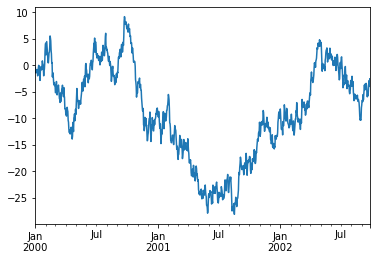

In [131]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [132]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [133]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

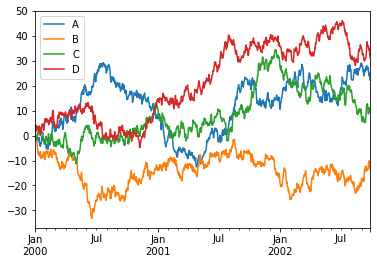

In [134]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [135]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [136]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.349269,0.124006,-0.530312,1.061871
1,2000-01-02,-1.895360,-0.259208,-2.101319,1.543373
2,2000-01-03,-1.013950,-0.869593,-1.118464,4.182589
3,2000-01-04,-1.570966,-1.870257,-1.027425,2.978211
4,2000-01-05,-0.846947,-2.101176,-0.236070,2.013921
...,...,...,...,...,...
995,2002-09-22,24.167596,-10.715894,8.972037,34.346664
996,2002-09-23,25.090191,-10.084760,11.220293,35.125452
997,2002-09-24,24.755978,-10.742087,10.903974,33.646207
998,2002-09-25,22.945854,-12.551831,9.668720,32.456018


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [139]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [140]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.349269,0.124006,-0.530312,1.061871
1,2000-01-02,-1.895360,-0.259208,-2.101319,1.543373
2,2000-01-03,-1.013950,-0.869593,-1.118464,4.182589
3,2000-01-04,-1.570966,-1.870257,-1.027425,2.978211
4,2000-01-05,-0.846947,-2.101176,-0.236070,2.013921
...,...,...,...,...,...
995,2002-09-22,24.167596,-10.715894,8.972037,34.346664
996,2002-09-23,25.090191,-10.084760,11.220293,35.125452
997,2002-09-24,24.755978,-10.742087,10.903974,33.646207
998,2002-09-25,22.945854,-12.551831,9.668720,32.456018
